# Lab 4 - Part B: Building models to optimise a function
The goal of this part of the practical is to implement steepest descent and Newton's method on a two-dimensional function.

This code finds the optimum of Rosenbrock's function - the definition is in the class `Rosenbrock` in [functions.py](functions.py) - look it up on the web! In order to make this work you will need to calculate the first and second derivatives of the function by hand, and then implement them in the `Rosenbrock` class. 

### Import modules

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.style.use('machinevision.mplstyle')

from functions import rosenbrock
from optimisation import SteepestDescent, NewtonMethod, optimise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define model and create data

In [9]:
x1, x2 = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
x = np.stack((x1, x2))
w = rosenbrock(x)

# Perform optimisation
Newton's method for optimisation has been implemented for you in [optimisation.py](optimisation.py), as the function named '`optimise`'. Given a start position and tolerance, '`optimise`' can optimize different functions. Each (mathematical) function is passed in as a class definition, which is expected to implement three methods so that '`optimise`' can apply Newton's method: 
1. '`call`' : returns the function value at a given `x` 
2. '`jacobian`' : returns the jacobian for that function at a given `x` 
3. '`hessian`' : returns the hessian for that function at a given `x` 

**TODO:** Here we will be optimizing the Rosenbrock function. You can find a placeholder for this function in [functions.py](functions.py). Complete the '`jacobian'` and '`hesian`' methods, and verify that '`optimise`'  correctly finds the minimum of the Rosenbrock function. You may assume `x` two-dimensional.

In [11]:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=NewtonMethod)

Iteration    1, Function 4.731547058170665
Iteration    2, Function 4.04559438799958
Iteration    3, Function 3.1598667654812473
Iteration    4, Function 1.9546545285513814
Iteration    5, Function 1.2536699924604089
Iteration    6, Function 0.6661552742025562
Iteration    7, Function 0.3239850888417397
Iteration    8, Function 0.10964145692801035
Iteration    9, Function 0.02050229370899138
Iteration   10, Function 6.284748058745878e-05
Iteration   11, Function 1.7463450497159333e-07
Iteration   12, Function 5.160754924158006e-13


# Visualise results

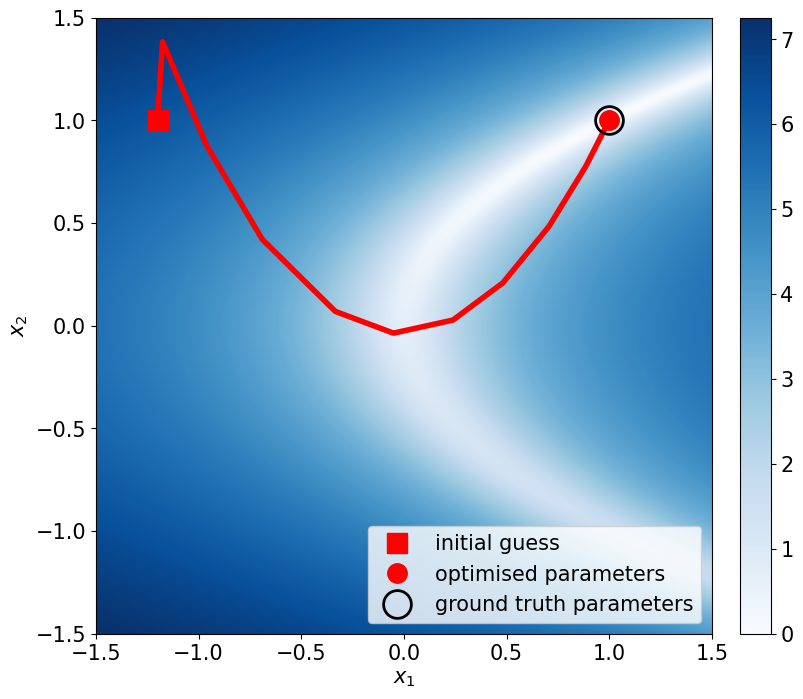

In [12]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');

# Things to investigate once you have gotten this to work

If you have correctly implemented the derivatives then the optimised parameters should have converged to approximately the same as the ground truth minimum. Great! Now try the extra tasks outlined below:

1. Change the routine to use steepest descent (Eq B.4 in the book's Appendix, page 603) rather than Newton's method. This has been defined in the same way as Newton's method in [optimisation.py](optimisation.py) - you just need to specify the update rule.
2. Implement the first derivative using finite differences rather than explicitly writing down the derivative. You may want to use the class in [numerical.py](numerical.py) for this.

Iteration    1, Function 4.128119842236855
Iteration    2, Function 2.8315489161740133
Iteration    3, Function 2.6502994320619506
Iteration    4, Function 2.510955234097085
Iteration    5, Function 2.3919720078213276
Iteration    6, Function 2.294711449486878
Iteration    7, Function 2.20499450114394
Iteration    8, Function 2.1284488596515314
Iteration    9, Function 2.055275434277797
Iteration   10, Function 1.9904278256387418
Iteration   11, Function 1.9271783546720354
Iteration   12, Function 1.8694769974881997
Iteration   13, Function 1.8125145776583536
Iteration   14, Function 1.7595008689857585
Iteration   15, Function 1.7066902960475234
Iteration   16, Function 1.6571754534957504
Iteration   17, Function 1.6074257323520083
Iteration   18, Function 1.5604868599476993
Iteration   19, Function 1.512974185140169
Iteration   20, Function 1.4677542538983661
Iteration   21, Function 1.4216043747781404
Iteration   22, Function 1.3772952125314037
Iteration   23, Function 1.331660810744

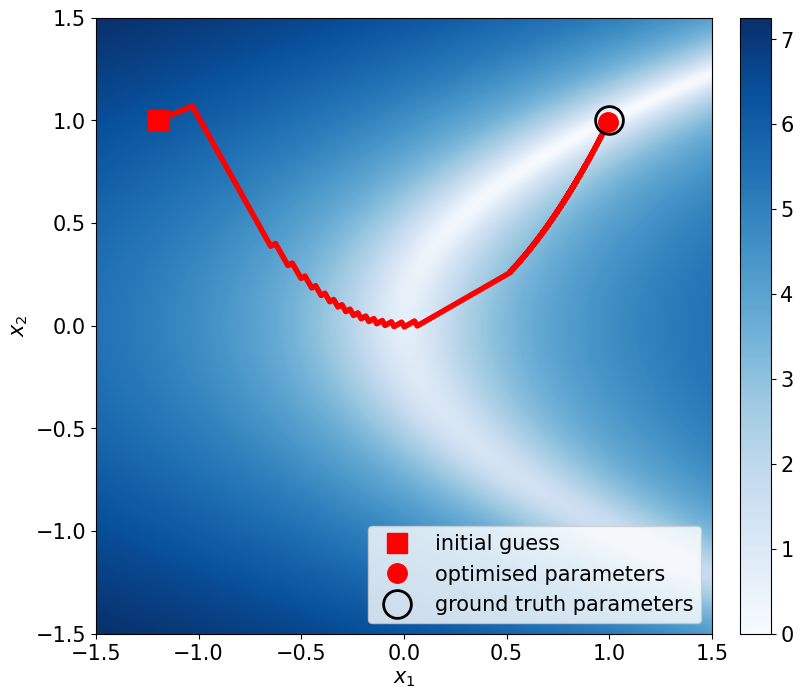

In [14]:
# qustion1:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=SteepestDescent)
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right')

Iteration    1, Function 4.741883947111849
Iteration    2, Function 4.056388372938491
Iteration    3, Function 3.141038424249164
Iteration    4, Function 1.9514978324466599
Iteration    5, Function 1.2602063114883755
Iteration    6, Function 0.6695200872262805
Iteration    7, Function 0.3133933295249005
Iteration    8, Function 0.07779540039066764
Iteration    9, Function 0.051976343401694755
Iteration   10, Function 0.021774975122053335
Iteration   11, Function 0.021139591502036554
Iteration   12, Function 0.021129065903192898
Iteration   13, Function 0.021128566594569045
Iteration   14, Function 0.02112854565559477
Iteration   15, Function 0.021128544751551258


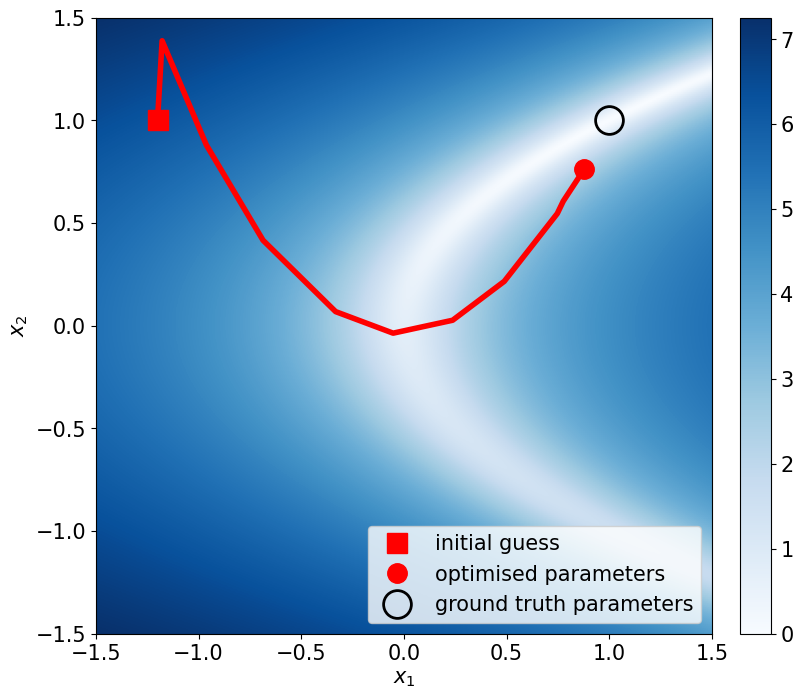

In [33]:
#question2
from numerical import RosenbrockFiniteDifference
from numerical import finite_difference
rosenbrock_fd = RosenbrockFiniteDifference()
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock_fd,
                                          optimiser=NewtonMethod)
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right')